# Credit Risk Classification

Credit risk poses a classification problem that’s inherently imbalanced. This is because healthy loans easily outnumber risky loans. In this Challenge, you’ll use various techniques to train and evaluate models with imbalanced classes. You’ll use a dataset of historical lending activity from a peer-to-peer lending services company to build a model that can identify the creditworthiness of borrowers.

## Instructions:

This challenge consists of the following subsections:

* Split the Data into Training and Testing Sets

* Create a Logistic Regression Model with the Original Data

* Predict a Logistic Regression Model with Resampled Training Data 

### Split the Data into Training and Testing Sets

Open the starter code notebook and then use it to complete the following steps.

1. Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

2. Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

    > **Note** A value of `0` in the “loan_status” column means that the loan is healthy. A value of `1` means that the loan has a high risk of defaulting.  

3. Check the balance of the labels variable (`y`) by using the `value_counts` function.

4. Split the data into training and testing datasets by using `train_test_split`.

### Create a Logistic Regression Model with the Original Data

Employ your knowledge of logistic regression to complete the following steps:

1. Fit a logistic regression model by using the training data (`X_train` and `y_train`).

2. Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.

4. Answer the following question: How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Predict a Logistic Regression Model with Resampled Training Data

Did you notice the small number of high-risk loan labels? Perhaps, a model that uses resampled data will perform better. You’ll thus resample the training data and then reevaluate the model. Specifically, you’ll use `RandomOverSampler`.

To do so, complete the following steps:

1. Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

2. Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

3. Evaluate the model’s performance by doing the following:

    * Calculate the accuracy score of the model.

    * Generate a confusion matrix.

    * Print the classification report.
    
4. Answer the following question: How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

### Write a Credit Risk Analysis Report

For this section, you’ll write a brief report that includes a summary and an analysis of the performance of both machine learning models that you used in this challenge. You should write this report as the `README.md` file included in your GitHub repository.

Structure your report by using the report template that `Starter_Code.zip` includes, and make sure that it contains the following:

1. An overview of the analysis: Explain the purpose of this analysis.


2. The results: Using bulleted lists, describe the balanced accuracy scores and the precision and recall scores of both machine learning models.

3. A summary: Summarize the results from the machine learning models. Compare the two versions of the dataset predictions. Include your recommendation for the model to use, if any, on the original vs. the resampled data. If you don’t recommend either model, justify your reasoning.

In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
df = pd.read_csv(Path("./Resources/lending_data.csv"))
# Review the DataFrame
# YOUR CODE HERE!
df.head()             

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.shape

(77536, 8)

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = df['loan_status']
# Separate the X variable, the features
# YOUR CODE HERE!
X = df.drop('loan_status', axis=1)

In [5]:
# Review the y variable Series
# YOUR CODE HERE!
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [6]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
# YOUR CODE HERE!
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

In [8]:
y.value_counts()[1]/y.shape[0] * 100

3.224308708212959

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [10]:
y_train.shape, y_test.shape

((58152,), (19384,))

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [11]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
model = LogisticRegression()

# Fit the model using training data
# YOUR CODE HERE!
lr_model = model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [12]:
# Make a prediction using the testing data
# YOUR CODE HERE!
y_preds = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [13]:
# Print the balanced_accuracy score of the model
# YOUR CODE HERE!
model_bal_acc = balanced_accuracy_score(y_test, y_preds)
model_bal_acc

0.95276202927065

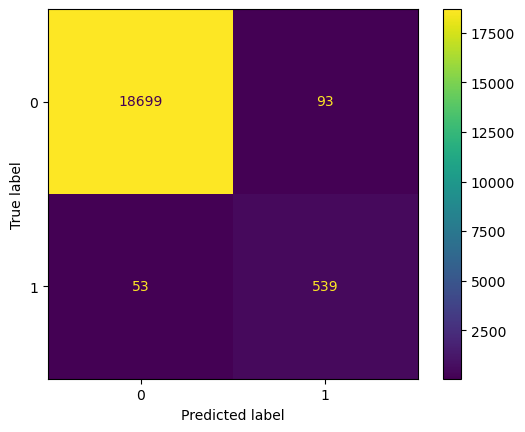

In [14]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
training_matrix = confusion_matrix(y_test, y_preds)
                                   
original = ConfusionMatrixDisplay(confusion_matrix=training_matrix,
                             display_labels=lr_model.classes_)
original.plot();

In [15]:
# Print the classification report for the model
# YOUR CODE HERE!
lr_model_class_report = classification_report_imbalanced(y_test, y_preds)
print(lr_model_class_report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.91      1.00      0.95      0.91     18792
          1       0.85      0.91      1.00      0.88      0.95      0.90       592

avg / total       0.99      0.99      0.91      0.99      0.95      0.91     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** overall, the model predicts very well having an average f1 score of 0.99.  The model does predict slightly better for the 'healthy loan' category, having an f1 score of 1.0 where the 'high-risk' loan has an f1 score of 0.88.  The model has an overall accuracy score of 95.3%.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [16]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
sampler = RandomOverSampler(random_state = 1)

# Fit the original training data to the random_oversampler model
# YOUR CODE HERE!
X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

In [17]:
X_resampled.shape

(112488, 7)

In [18]:
# Count the distinct values of the resampled labels data
# YOUR CODE HERE!
y_resampled.value_counts()

0    56244
1    56244
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [19]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
os_model = LogisticRegression()

# Fit the model using the resampled training data
# YOUR CODE HERE!
lr_os_model = os_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
# YOUR CODE HERE!
y_os_preds = lr_os_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!
os_model_bal_acc = balanced_accuracy_score(y_test, y_os_preds)
os_model_bal_acc

0.9954904617260939

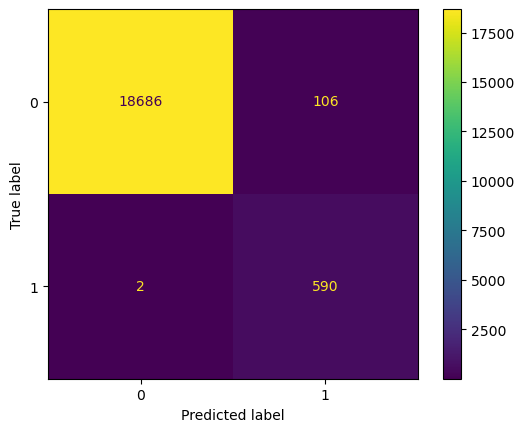

In [21]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
training_matrix = confusion_matrix(y_test, y_os_preds)
                                   
oversampled = ConfusionMatrixDisplay(confusion_matrix=training_matrix,
                             display_labels=lr_os_model.classes_)
oversampled.plot();

In [22]:
# Print the classification report for the model
# YOUR CODE HERE!
lr_os_model_class_report = classification_report_imbalanced(y_test, y_os_preds)
print(lr_os_model_class_report)

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      1.00      1.00      1.00      0.99     18792
          1       0.85      1.00      0.99      0.92      1.00      0.99       592

avg / total       1.00      0.99      1.00      0.99      1.00      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model with the oversampled data performed as well as the model with original data. Having an average f1 score of 0.99. The 'healthy loan' class showed an f1 score of 1.00 while the 'high risk' class showed an f1 score of 0.92. The oversampled model had an accuracy score of 99.5%
